# Categorizing salaries
Now it's time to make a new category! You'll use the variables `twenty_fifth`, `salaries_median`, and `seventy_fifth`, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called `"salary_level"`, which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

`pandas` has been imported as `pd`, `matplotlib.pyplot` as `plt`, `seaborn` as `sns`, and the salaries dataset as a `pandas` DataFrame called `salaries`.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

salaries= pd.read_excel(r"D:\Cursos\Data_Science_Python\data_sets\salaries_clean.xlsx")
salaries.date_of_response = pd.to_datetime(salaries.date_of_response,dayfirst=True)

#conditions fo job category
Job_Category = ['Machine Learning','Data Engineering','Data Analytics', 'Data Science', 'Other','Managerial']

Machine_Learning = ['Machine Learning Scientist', 'Machine Learning Engineer','Machine Learning Manager', 'AI Scientist', 'ML Engineer' ,'Applied Machine Learning Scientist' ,'Head of Machine Learning', 'Machine Learning Developer' ,'Lead Machine Learning Engineer']
 
Data_Engineering =  ['Big Data Engineer', 'Lead Data Engineer', 'Data Engineer', 'Data Engineering Manager' ,'Director of Data Engineering', 'Principal Data Engineer', 'Cloud Data Engineer', 'Data Architect', 'Machine Learning Infrastructure Engineer', 'ETL Developer']
 
Data_Analytics =  ['Product Data Analyst', 'Data Analyst', 'Business Data Analyst' , 'Lead Data Analyst', 'BI Data Analyst','Data Analytics Engineer' ,'Financial Data Analyst', 'Data Analytics Manager', 
                    'Finance Data Analyst', 'Principal Data Analyst','Analytics Engineer' ,'Data Analytics Lead']
 
Data_Science =  ['Lead Data Scientist','Data Scientist', 'Principal Data Scientist', 'Applied Data Scientist','Staff Data Scientist', 'NLP Engineer']
 
Other =  ['Research Scientist','3D Computer Vision Researcher', 'Data Science Consultant','Computer Vision Software Engineer', 'Data Science Engineer', 'Computer Vision Engineer']
 
Managerial =  ['Data Science Manager', 'Head of Data', 'Head of Data Science', 'Director of Data Science']

conditions = [
    (salaries["Designation"].isin(Machine_Learning)),
    (salaries["Designation"].isin(Data_Engineering)),
    (salaries["Designation"].isin(Data_Analytics)),
    (salaries["Designation"].isin(Data_Science)),
    (salaries["Designation"].isin(Other)),
    (salaries["Designation"].isin(Managerial))

]

#assignation
salaries["Job_Category"] = np.select(conditions, 
                                        Job_Category,
                                        default="XD")
salaries.head(10)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,date_of_response,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,2023-02-26,Data Science
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,2023-08-30,Machine Learning
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,2023-02-19,Data Engineering
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,2023-02-12,Data Analytics
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,2023-07-19,Machine Learning
5,2020,Data Analyst,Entry,FT,US,L,100,68748.0,2023-06-01,Data Analytics
6,2020,Lead Data Scientist,Senior,FT,US,S,100,181418.0,2023-06-10,Data Science
7,2020,Data Scientist,Mid,FT,HU,L,50,34121.0,2023-07-10,Data Science
8,2020,Business Data Analyst,Mid,FT,US,L,100,128903.0,2023-07-21,Data Analytics
9,2020,Lead Data Engineer,Senior,FT,NZ,S,50,119354.0,2023-08-29,Data Engineering


In [2]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

Create salary_labels, a list containing "entry", "mid", "senior", and "exec".

In [3]:
# Create salary labels
salary_labels = ["entry","mid","senior","exec"]

* Finish `salary_ranges`, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD"

In [4]:
# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

* Split "Salary_USD" based on the labels and ranges you've created.

In [5]:
# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

* Use sns.countplot() to visualize the count of `"Company_Size"`, factoring salary level labels.

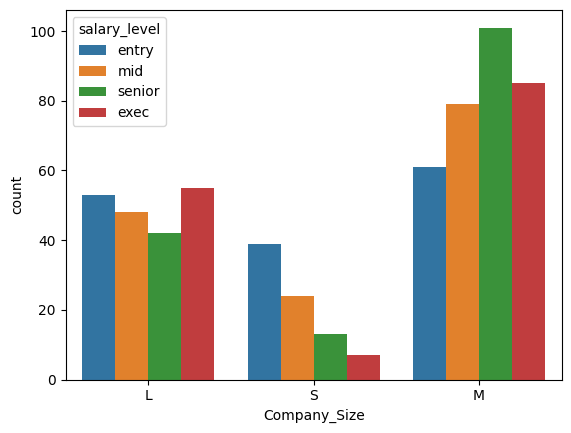

In [6]:
# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()